# Import packages

In [1]:
import os
import cmaps
import cmocean
import numpy as np
import xarray as xr
import scipy.io as sio
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.gridspec as gridspec
from scipy.interpolate import griddata
from netCDF4 import Dataset
from datetime import date
from xarrayMannKendall import Mann_Kendall_test
from mpl_toolkits.basemap import Basemap
from matplotlib.pyplot import Polygon
from matplotlib import rcParams
from matplotlib.backends.backend_pdf import PdfPages
rcParams['font.family'] = 'sans-serif'
directory   = '/srv/scratch/z3533156'

# Read meridional heat transport from BRAN

In [ ]:
#################################################################################################
dataset0          = sio.loadmat(directory+'/BRAN_WBC/SO/Figure2_mean.mat')
bran_lon          = dataset0['bran_lon'][:,:]
bran_lat          = dataset0['bran_lat'][:,:]
bran_v_transport  = dataset0['bran_v_transport_monthly_mean'][:,:]
ARC_v_transport   = bran_v_transport[1:500,152:503]     # AR
EAC_v_transport   = bran_v_transport[1449:1650,152:403] # EAC
BC_v_transport    = bran_v_transport[2949:3200,102:403] # BC
ARC_lon           = bran_lon[1:500,152:503]     # AR
EAC_lon           = bran_lon[1449:1650,152:403] # EAC
BC_lon            = bran_lon[2949:3200,102:403] # BC
ARC_lat           = bran_lat[1:500,152:503]     # AR
EAC_lat           = bran_lat[1449:1650,152:403] # EAC
BC_lat            = bran_lat[2949:3200,102:403] # BC
##########################  heat transport  #####################################################
dataset1          = sio.loadmat(directory+'/BRAN_WBC/SO/Figure3_vt_transport.mat')
ARC_vt_loc        = dataset1['ARC_vt_loc'][:,:]
ARC_vt_trans_lat  = dataset1['ARC_vt_trans_lat'][:,:]
EAC_vt_loc        = dataset1['EAC_vt_loc'][:,:]
EAC_vt_trans_lat  = dataset1['EAC_vt_trans_lat'][:,:]
BC_vt_loc         = dataset1['BC_vt_loc'][:,:]
BC_vt_trans_lat   = dataset1['BC_vt_trans_lat'][:,:]
ds1 = xr.Dataset(data_vars=dict(ARC_vt_trans_lat=(["latitude","time"], ARC_vt_trans_lat)))
ARC_vt_trans_lat0 = ds1.ARC_vt_trans_lat
ARC_vt_trans_lat1 = ARC_vt_trans_lat0.sortby('time')
ARC_vt_trans_lat  = Mann_Kendall_test(ARC_vt_trans_lat1,'time',MK_modified=True,method="linregress",alpha=0.05,
                                coords_name = {'time':'time','x':'latitude'})
ARC_vt_trans_lat_trend = ARC_vt_trans_lat.compute()
ARC_vt_trend=ARC_vt_trans_lat_trend.trend*120
ARC_vt_trend1=ARC_vt_trans_lat_trend.trend*120
ARC_vt_std=ARC_vt_trans_lat_trend.std_error*120
ARC_vt_p=ARC_vt_trans_lat_trend.p.values
ARC_vt_trend1[np.where(ARC_vt_p > 0.05)] = np.nan
ARC_vt_std[np.where(ARC_vt_p   > 0.05)] = np.nan

ds2 = xr.Dataset(data_vars=dict(EAC_vt_trans_lat=(["latitude","time"], EAC_vt_trans_lat)))
EAC_vt_trans_lat0 = ds2.EAC_vt_trans_lat
EAC_vt_trans_lat1 = EAC_vt_trans_lat0.sortby('time')
EAC_vt_trans_lat  = Mann_Kendall_test(EAC_vt_trans_lat1,'time',MK_modified=True,method="linregress",alpha=0.05,
                                coords_name = {'time':'time','x':'latitude'})
EAC_vt_trans_lat_trend = EAC_vt_trans_lat.compute()
EAC_vt_trend=EAC_vt_trans_lat_trend.trend*120
EAC_vt_trend1=EAC_vt_trans_lat_trend.trend*120
EAC_vt_std=EAC_vt_trans_lat_trend.std_error*120
EAC_vt_p=EAC_vt_trans_lat_trend.p.values
EAC_vt_trend1[np.where(EAC_vt_p > 0.05)] = np.nan
EAC_vt_std[np.where(EAC_vt_p   > 0.05)] = np.nan

ds3 = xr.Dataset(data_vars=dict(BC_vt_trans_lat=(["latitude","time"], BC_vt_trans_lat)))
BC_vt_trans_lat0 = ds3.BC_vt_trans_lat
BC_vt_trans_lat1 = BC_vt_trans_lat0.sortby('time')
BC_vt_trans_lat  = Mann_Kendall_test(BC_vt_trans_lat1,'time',MK_modified=True,method="linregress",alpha=0.05,
                                coords_name = {'time':'time','x':'latitude'})
BC_vt_trans_lat_trend = BC_vt_trans_lat.compute()
BC_vt_trend=BC_vt_trans_lat_trend.trend*120
BC_vt_trend1=BC_vt_trans_lat_trend.trend*120
BC_vt_std=BC_vt_trans_lat_trend.std_error*120
BC_vt_p=BC_vt_trans_lat_trend.p.values
BC_vt_trend1[np.where(BC_vt_p > 0.05)] = np.nan
BC_vt_std[np.where(BC_vt_p   > 0.05)] = np.nan
##########################  volume transport  ###################################################
dataset2          = sio.loadmat(directory+'/BRAN_WBC/SO/Figure3_v_transport.mat')
ARC_v_loc        = dataset2['ARC_v_loc'][:,:]
ARC_v_trans_lat  = dataset2['ARC_v_trans_lat'][:,:]
EAC_v_loc        = dataset2['EAC_v_loc'][:,:]
EAC_v_trans_lat  = dataset2['EAC_v_trans_lat'][:,:]
BC_v_loc         = dataset2['BC_v_loc'][:,:]
BC_v_trans_lat   = dataset2['BC_v_trans_lat'][:,:]
ds11 = xr.Dataset(data_vars=dict(ARC_v_trans_lat=(["latitude","time"], ARC_v_trans_lat)))
ARC_v_trans_lat0 = ds11.ARC_v_trans_lat
ARC_v_trans_lat1 = ARC_v_trans_lat0.sortby('time')
ARC_v_trans_lat  = Mann_Kendall_test(ARC_v_trans_lat1,'time',MK_modified=True,method="linregress",alpha=0.05,
                                coords_name = {'time':'time','x':'latitude'})
ARC_v_trans_lat_trend = ARC_v_trans_lat.compute()
ARC_v_trend=ARC_v_trans_lat_trend.trend*120
ARC_v_trend1=ARC_v_trans_lat_trend.trend*120
ARC_v_std=ARC_v_trans_lat_trend.std_error*120
ARC_v_p=ARC_v_trans_lat_trend.p.values
ARC_v_trend1[np.where(ARC_v_p > 0.05)] = np.nan
ARC_v_std[np.where(ARC_v_p   > 0.05)] = np.nan

ds22 = xr.Dataset(data_vars=dict(EAC_v_trans_lat=(["latitude","time"], EAC_v_trans_lat)))
EAC_v_trans_lat0 = ds22.EAC_v_trans_lat
EAC_v_trans_lat1 = EAC_v_trans_lat0.sortby('time')
EAC_v_trans_lat  = Mann_Kendall_test(EAC_v_trans_lat1,'time',MK_modified=True,method="linregress",alpha=0.05,
                                coords_name = {'time':'time','x':'latitude'})
EAC_v_trans_lat_trend = EAC_v_trans_lat.compute()
EAC_v_trend=EAC_v_trans_lat_trend.trend*120
EAC_v_trend1=EAC_v_trans_lat_trend.trend*120
EAC_v_std=EAC_v_trans_lat_trend.std_error*120
EAC_v_p=EAC_v_trans_lat_trend.p.values
EAC_v_trend1[np.where(EAC_v_p > 0.05)] = np.nan
EAC_v_std[np.where(EAC_v_p   > 0.05)] = np.nan

ds33 = xr.Dataset(data_vars=dict(BC_v_trans_lat=(["latitude","time"], BC_v_trans_lat)))
BC_v_trans_lat0 = ds33.BC_v_trans_lat
BC_v_trans_lat1 = BC_v_trans_lat0.sortby('time')
BC_v_trans_lat  = Mann_Kendall_test(BC_v_trans_lat1,'time',MK_modified=True,method="linregress",alpha=0.05,
                                coords_name = {'time':'time','x':'latitude'})
BC_v_trans_lat_trend = BC_v_trans_lat.compute()
BC_v_trend=BC_v_trans_lat_trend.trend*120
BC_v_trend1=BC_v_trans_lat_trend.trend*120
BC_v_std=BC_v_trans_lat_trend.std_error*120
BC_v_p=BC_v_trans_lat_trend.p.values
BC_v_trend1[np.where(BC_v_p > 0.05)] = np.nan
BC_v_std[np.where(BC_v_p   > 0.05)] = np.nan

# Plot the spatial distribution of meridional heat transport

<ipython-input-6-0cf3bbf5dbd6>:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  cbaxes1     = fig.add_axes([0.135, 0.62, 0.95, 0.01])
<ipython-input-6-0cf3bbf5dbd6>:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  cbaxes1     = fig.add_axes([0.135, 0.62, 0.95, 0.01])


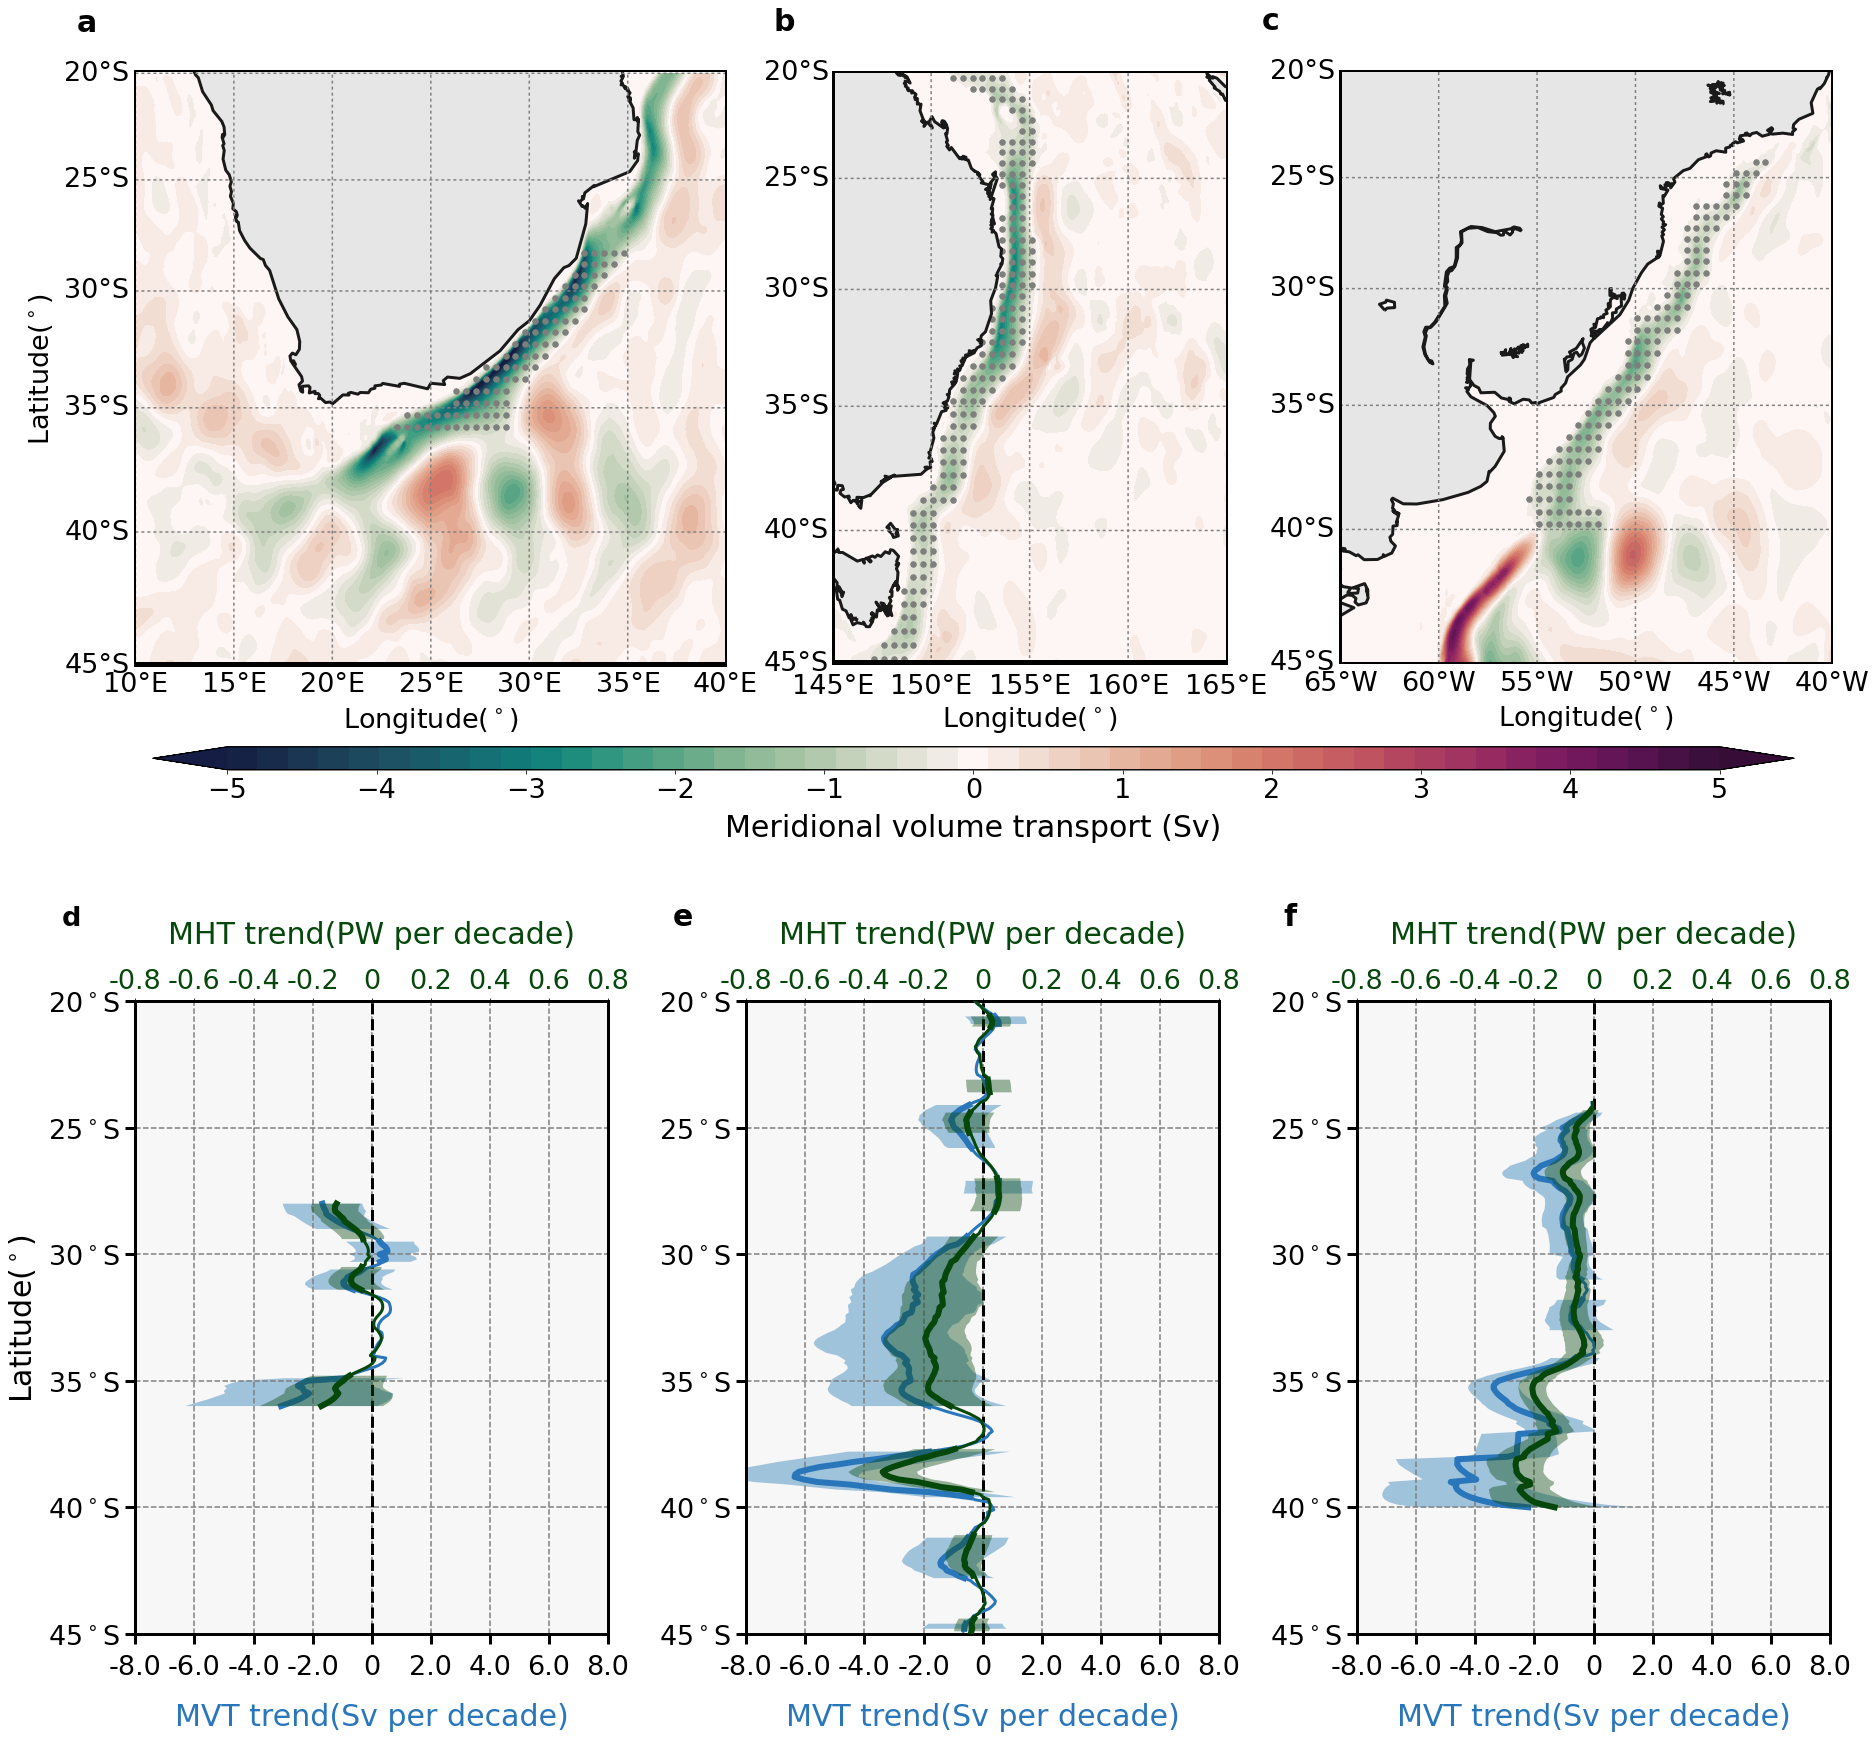

In [6]:
##############################################################################################################
labels        = ['a','b','c','d','e','f']
levels1       = np.linspace(-5,5,50)
tick_marks1   = np.linspace(-5,5,11)
cmaps1        = cmaps.cmocean_curl
fig_ratio     = 0.9
fig           = plt.figure(figsize=(24, 32))
gs            = gridspec.GridSpec(2,3)
labelfont     = 30
padspacescale = 10
labelpadscale = 2
linefont      = 3
scale         = 1.0
m_scale       = 8   
##############################################################################################################
for i in range(3):
    ax = fig.add_subplot(gs[i])
    l, b, w, h = ax.get_position().bounds
    if i==0:
        lon   = bran_lon[1:500,152:503]      
        lat   = bran_lat[1:500,152:503]
        var   = ARC_v_transport  
        m     = Basemap(projection='merc',suppress_ticks=True,llcrnrlat=-45,urcrnrlat= -20+0.1,llcrnrlon=10,urcrnrlon=40,resolution='l')                    
        cx,cy = m(7, -18.0)
        x, y  = m(lon, lat)
        yy = np.arange(1, y.shape[0], 5)
        xx = np.arange(1, x.shape[1], 5)
        points = np.meshgrid(yy, xx)
        point_index=tuple(points)
        stipple_p=ARC_vt_loc 
        point_x=x[point_index]
        point_y=y[point_index]
        point_z=stipple_p[point_index]
        point_x=np.ravel(point_x)
        point_y=np.ravel(point_y)
        point_z=np.ravel(point_z)
        point_x=point_x[~np.isnan(point_z)]
        point_y=point_y[~np.isnan(point_z)]
        CB1=m.contourf(x, y, var,cmap=cmaps1,levels=levels1,origin='lower',extend='both')
        CS1 = m.scatter(point_x,point_y,s=15*m_scale,c='xkcd:medium grey',marker='.') 
        plt.xlabel(r'Longitude($^\circ$)',fontsize=0.9*labelfont,labelpad=40,family='sans-serif') 
        plt.ylabel(r'Latitude($^\circ$)',fontsize=0.9*labelfont,labelpad=80,family='sans-serif') 
    elif i==1:
        l=l+0.13
        b=b+0.086
        lon = bran_lon[1449:1650,152:403]      
        lat = bran_lat[1449:1650,152:403] 
        var = EAC_v_transport # EAC
        m   = Basemap(projection='merc',suppress_ticks=True,llcrnrlat=-45,urcrnrlat= -20+0.0001,llcrnrlon=145-0.0,urcrnrlon=np.nanmax(lon),resolution='l')                    
        cx,cy = m(142, -18.0)
        x, y = m(lon, lat)
        yy = np.arange(1, y.shape[0], 5)
        xx = np.arange(1, x.shape[1], 5)
        points = np.meshgrid(yy, xx)
        point_index=tuple(points)
        stipple_p=EAC_vt_loc 
        point_x=x[point_index]
        point_y=y[point_index]
        point_z=stipple_p[point_index]
        point_x=np.ravel(point_x)
        point_y=np.ravel(point_y)
        point_z=np.ravel(point_z)
        point_x=point_x[~np.isnan(point_z)]
        point_y=point_y[~np.isnan(point_z)]
        CB1=m.contourf(x, y, var,cmap=cmaps1,levels=levels1,origin='lower',extend='both')
        CS1 = m.scatter(point_x,point_y,s=15*m_scale,c='xkcd:medium grey',marker='.') 
        plt.xlabel(r'Longitude($^\circ$)',fontsize=0.9*labelfont,labelpad=40,family='sans-serif') 
    elif i==2: 
        l=l+0.15
        b=b+0.0435
        lon = bran_lon[2949:3200,102:403]      
        lat = bran_lat[2949:3200,102:403] 
        var = BC_v_transport #BC
        m   = Basemap(projection='merc',suppress_ticks=True,llcrnrlat=-45-0.0001,urcrnrlat= -20+0.0001,llcrnrlon=np.nanmin(lon)-0.02,urcrnrlon=np.nanmax(lon),resolution='l')            
        cx,cy = m(291, -18)
        x, y = m(lon, lat)
        yy = np.arange(1, y.shape[0], 5)
        xx = np.arange(1, x.shape[1], 5)
        points = np.meshgrid(yy, xx)
        point_index=tuple(points)
        stipple_p=BC_vt_loc 
        point_x=x[point_index]
        point_y=y[point_index]
        point_z=stipple_p[point_index]
        point_x=np.ravel(point_x)
        point_y=np.ravel(point_y)
        point_z=np.ravel(point_z)
        point_x=point_x[~np.isnan(point_z)]
        point_y=point_y[~np.isnan(point_z)]
        CB1=m.contourf(x, y, var,cmap=cmaps1,levels=levels1,origin='lower',extend='both')
        CS1 = m.scatter(point_x,point_y,s=15*m_scale,c='xkcd:medium grey',marker='.') 
        plt.xlabel(r'Longitude($^\circ$)',fontsize=0.9*labelfont,labelpad=40,family='sans-serif') 
    m.drawparallels(np.arange(-60,-0, 5),labels=[1,0,0,0],linewidth=0.5*linefont,dashes=[2,2],color='.5',fontsize=0.9*labelfont,family='sans-serif')    
    m.drawmeridians(np.arange(0,360, 5),labels=[0,0,0,1],linewidth=0.5*linefont,dashes=[2,2],color='.5',fontsize=0.9*labelfont,family='sans-serif')
    m.drawcoastlines(color='0.1',  linewidth=linefont)
    m.fillcontinents(color='0.9', lake_color='white') 
    plt.text(cx, cy,labels[i],color='xkcd:black', fontsize=labelfont, weight='bold',family='sans-serif')
    m.plot(x[0,:],  y[0,:],linewidth=linefont, linestyle='solid', color='k')
    m.plot(x[:,0],  y[:,0],linewidth=linefont, linestyle='solid', color='k')
    m.plot(x[-1,:], y[-1,:],linewidth=linefont, linestyle='solid', color='k')
    m.plot(x[:,-1], y[:,-1],linewidth=linefont, linestyle='solid', color='k')
    ax.spines['left'].set_linewidth(labelpadscale)
    ax.spines['top'].set_linewidth(labelpadscale)
    ax.spines['right'].set_linewidth(labelpadscale)
    ax.spines['bottom'].set_linewidth(labelpadscale)
    plt.tick_params(axis='x',which='major',bottom='on',left='on',top='on',right='on',length=25,width=2,colors='black',direction='out')       
    cbaxes1     = fig.add_axes([0.135, 0.62, 0.95, 0.01])
    cb1 = plt.colorbar(CB1,orientation='horizontal',cax = cbaxes1)
    cb1.set_ticks(tick_marks1)
    cb1.ax.tick_params(labelsize=0.9*labelfont)
    cb1.set_label(r'Meridional volume transport (Sv)', fontsize=labelfont,labelpad=10,family='sans-serif')
    ax.set_position([l, b, scale*w, scale*h]) 
    if i==0:
        ax.set_position([l, b, 1.5*scale*w, 1.5*scale*h])   
    elif i==1:
        ax.set_position([l, b, scale*w, scale*h])   
    else:
        ax.set_position([l, b, 1.25*scale*w, 1.25*scale*h]) 
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
linefont  = 3
for i in range(3):
    ax1 = fig.add_subplot(gs[i+3],facecolor='0.97')
    l, b, w, h = ax1.get_position().bounds
    if i==0:
        ax1.plot(ARC_v_trend,  ARC_lat[0,:], color='xkcd:bluish',    linewidth=linefont,zorder=3)
        ax1.plot(ARC_v_trend1, ARC_lat[0,:], color='xkcd:bluish', linewidth=2*linefont)
        ax1.fill_betweenx(ARC_lat[0,:],ARC_v_trend-ARC_v_std, ARC_v_trend+ARC_v_std ,alpha=0.4)
        plt.text(-10.5, -17,labels[i+3],color='xkcd:black', fontsize=0.9*labelfont, weight='bold',family='sans-serif')
        ax1.set_ylabel(r'Latitude($^\circ$)',fontsize=labelfont,labelpad=10,family='sans-serif')  
        
        ax2 = ax1.twiny()
        ax2.plot(ARC_vt_trend,  ARC_lat[0,:], color='xkcd:forest green',    linewidth=linefont,zorder=3)
        ax2.plot(ARC_vt_trend1, ARC_lat[0,:], color='xkcd:forest green', linewidth=2*linefont)
        ax2.fill_betweenx(ARC_lat[0,:],ARC_vt_trend-ARC_vt_std, ARC_vt_trend+ARC_vt_std ,facecolor='xkcd:forest green',alpha=0.4)
    elif i==1:
        l=l+0.08
        ax1.plot(EAC_v_trend,  EAC_lat[0,:], color='xkcd:bluish',    linewidth=linefont,zorder=3)
        ax1.plot(EAC_v_trend1, EAC_lat[0,:], color='xkcd:bluish', linewidth=2*linefont)
        ax1.fill_betweenx(EAC_lat[0,:],EAC_v_trend-EAC_v_std, EAC_v_trend+EAC_v_std ,alpha=0.4)
        plt.text(-10.5, -17,labels[i+3],color='xkcd:black', fontsize=labelfont, weight='bold',family='sans-serif')

        ax2 = ax1.twiny()
        ax2.plot(EAC_vt_trend,  EAC_lat[0,:], color='xkcd:forest green',    linewidth=linefont,zorder=3)
        ax2.plot(EAC_vt_trend1, EAC_lat[0,:], color='xkcd:forest green', linewidth=2*linefont)
        ax2.fill_betweenx(EAC_lat[0,:],EAC_vt_trend-EAC_vt_std, EAC_vt_trend+EAC_vt_std ,facecolor='xkcd:forest green',alpha=0.4)
    else:
        l=l+0.16
        ax1.plot(BC_v_trend,  BC_lat[0,:], color='xkcd:bluish',    linewidth=linefont,zorder=3)
        ax1.plot(BC_v_trend1, BC_lat[0,:], color='xkcd:bluish', linewidth=2*linefont)
        ax1.fill_betweenx(BC_lat[0,:],BC_v_trend-BC_v_std,BC_v_trend+BC_v_std ,alpha=0.4)
        plt.text(-10.5, -17,labels[i+3],color='xkcd:black', fontsize=labelfont, weight='bold',family='sans-serif')
    
        ax2 = ax1.twiny()
        ax2.plot(BC_vt_trend,  BC_lat[0,:], color='xkcd:forest green',    linewidth=linefont,zorder=3)
        ax2.plot(BC_vt_trend1, BC_lat[0,:], color='xkcd:forest green', linewidth=2*linefont)
        ax2.fill_betweenx(BC_lat[0,:],BC_vt_trend-BC_vt_std, BC_vt_trend+BC_vt_std ,facecolor='xkcd:forest green',alpha=0.4)

    ax1.spines['bottom'].set_linewidth(linefont)
    ax1.spines['left'].set_linewidth(linefont)
    ax1.spines['top'].set_linewidth(linefont)
    ax1.spines['right'].set_linewidth(linefont)     
    ax1.plot([0,0], [-45,-20], color='black', linewidth=linefont,linestyle='dashed')
    ax1.set_xlim(-8,8)
    ax1.set_xticks(np.linspace(-8,8,9))     
    ax1.set_xticklabels(['-8.0','-6.0','-4.0','-2.0','0','2.0','4.0','6.0','8.0'],fontsize=0.9*labelfont,color='xkcd:bluish')
    ax1.axes.xaxis.set_tick_params(pad=10)
    ax1.set_xlabel('MVT trend(Sv per decade)',fontsize=labelfont,labelpad=22,family='sans-serif',color='xkcd:bluish')
    ax1.set_ylim(-45,-20)       
    ax1.set_yticks(np.linspace(-45,-20,6))
    ax1.set_yticklabels(['45$^\circ$S','40$^\circ$S','35$^\circ$S','30$^\circ$S','25$^\circ$S','20$^\circ$S'],fontsize=0.9*labelfont)  
    ax1.axes.yaxis.set_tick_params(pad=5)
    ax1.grid(True,color ="tab:gray",linestyle='dashed', linewidth=0.5*linefont)
    ax1.tick_params(axis='x',which='major',bottom='on',length=10.0,width=linefont,colors='black',direction='out')
    ax1.tick_params(axis='y',left='off',length=10,width=linefont,colors='black',direction='out')   
    ax2.set_xlim(-0.8,0.8)
    ax2.set_xticks(np.linspace(-0.8,0.8,9))     
    ax2.set_xticklabels(['-0.8','-0.6','-0.4','-0.2','0','0.2','0.4','0.6','0.8'],fontsize=0.9*labelfont,color='xkcd:forest green')  
    ax2.set_xlabel('MHT trend(PW per decade)',fontsize=labelfont,labelpad=25,family='sans-serif',color='xkcd:forest green')  
    if i==0:
        ax1.set_position([l, b+0.12, 1.2*scale*w, 0.8*scale*h])   
    elif i==1:
        ax1.set_position([l, b+0.12, 1.2*scale*w, 0.8*scale*h]) 
    else:
        ax1.set_position([l, b+0.12, 1.2*scale*w, 0.8*scale*h]) 

fig.savefig(directory+'/BRAN_WBC/SO/Figure3_v_transport.pdf',dpi=300,bbox_inches = 'tight')